# **Practica 8 - Ecuaciones de Fresnel.**.
Valentina Merchán Sanchez, Sergio Alejandro Prieto, Angee Vanessa Segura.  
  Mediciones de Optica y Acustica.  
  Universidad Nacional de Colombia - 2025-1

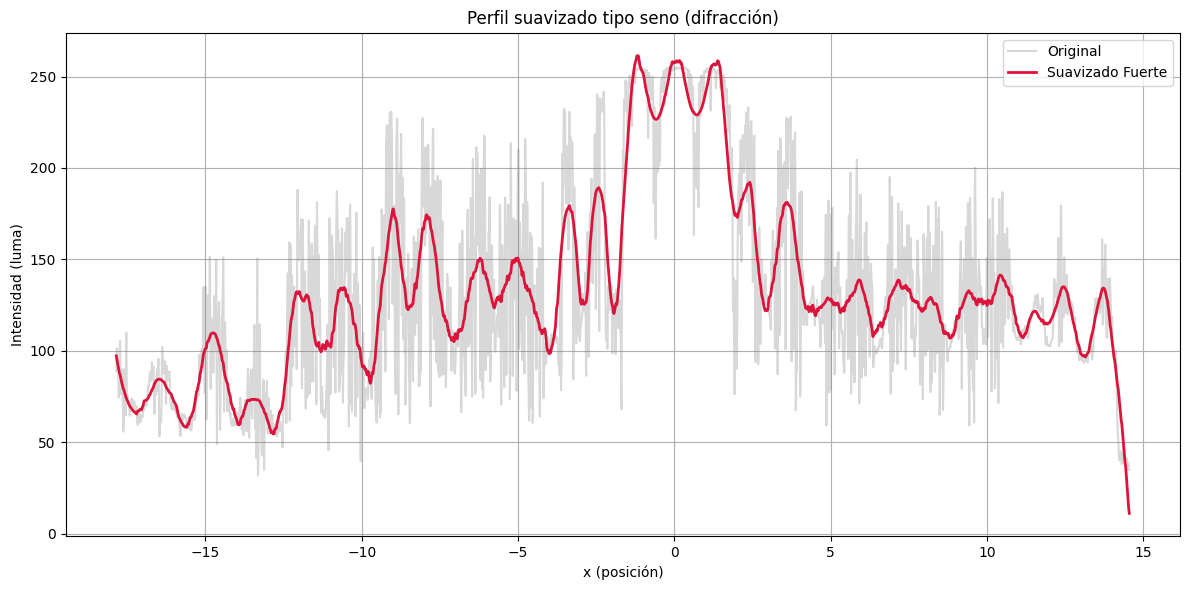

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

# Ruta al archivo de datos
archivo = "doblerejilla.txt"

# Leer datos con tabulación y coma decimal
df = pd.read_csv(archivo, sep='\t', decimal=',', header=None, names=["x", "y"])

# Suavizado más fuerte para forma senoidal
# Prueba 3 niveles distintos
#suave1 = savgol_filter(df["y"], window_length=51, polyorder=2)
#suave2 = savgol_filter(df["y"], window_length=71, polyorder=2)
suave3 = savgol_filter(df["y"], window_length=101, polyorder=2)

# Graficar todas las versiones
plt.figure(figsize=(12, 6))
plt.plot(df["x"], df["y"], label="Original", alpha=0.3, color="gray")
#plt.plot(df["x"], suave1, label="Suavizado leve (51)", linewidth=1.5, color="blue")
#plt.plot(df["x"], suave2, label="Medio (71)", linewidth=1.5, color="orange")
plt.plot(df["x"], suave3, label="Suavizado Fuerte", linewidth=2, color="crimson")

plt.xlabel("x (posición)")
plt.ylabel("Intensidad (luma)")
plt.title("Perfil suavizado tipo seno (difracción)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


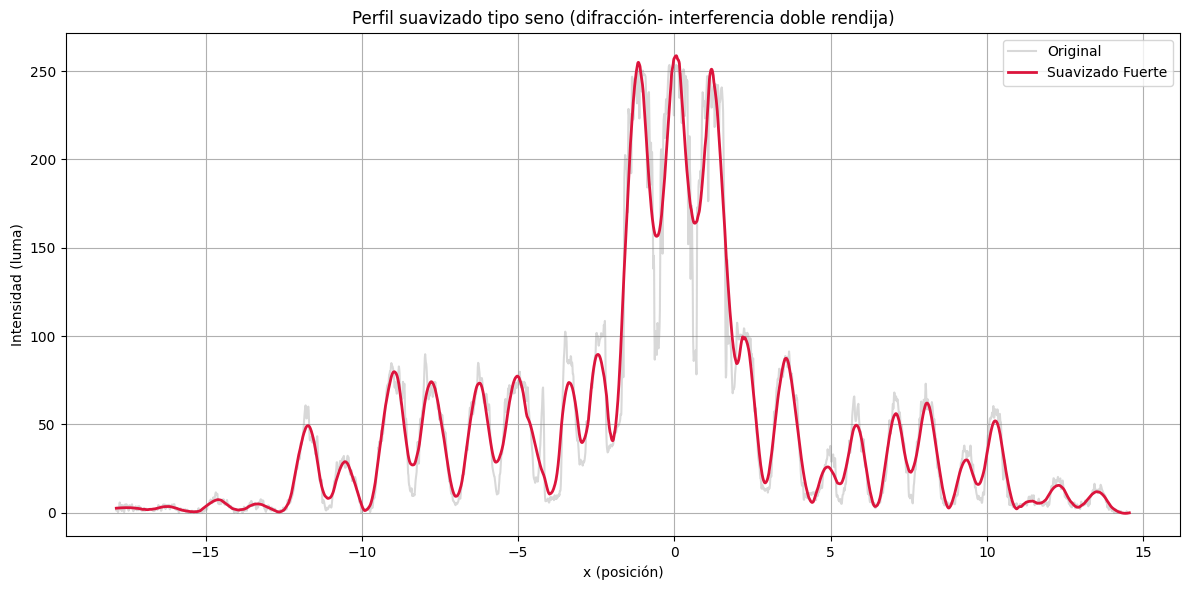

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

# Ruta al archivo de datos
archivo = "DobleRendija.txt"

# Leer datos con tabulación y coma decimal
df = pd.read_csv(archivo, sep='\t', decimal=',', header=None, names=["x", "y"])

# Suavizado más fuerte para forma senoidal
# Prueba 3 niveles distintos
#suave1 = savgol_filter(df["y"], window_length=51, polyorder=2)
#suave2 = savgol_filter(df["y"], window_length=71, polyorder=2)
suave3 = savgol_filter(df["y"], window_length=101, polyorder=2)

# Graficar todas las versiones
plt.figure(figsize=(12, 6))
plt.plot(df["x"], df["y"], label="Original", alpha=0.3, color="gray")
#plt.plot(df["x"], suave1, label="Suavizado leve (51)", linewidth=1.5, color="blue")
#plt.plot(df["x"], suave2, label="Medio (71)", linewidth=1.5, color="orange")
plt.plot(df["x"], suave3, label="Suavizado Fuerte", linewidth=2, color="crimson")

plt.xlabel("x (posición)")
plt.ylabel("Intensidad (luma)")
plt.title("Perfil suavizado tipo seno (difracción- interferencia doble rendija)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
